## Датасет: TED Talks

## Описание:

Данные обо всех аудио-видео записях выступлений TED, загруженный на официальный сайт ted.com до 21 сентября 2017 года. Основной набор данных содержит информацию обо всех выступлениях, включая количество просмотров, количество комментариев, описания, имена докладчиков и заголовки. 

Датасет содержит 2550 строки и следующие столбцы:

№ | Название | Описание | Тип данных | Шкала
--- | --- | --- | --- | ---
1 | comments | Количество комментариев, сделанных во время выступления | int | относительная 
2 | description | Описание выступления | string | номинальная
3 | duration | Продолжительность видео в секундах | int | интервальная 
4 | event | Место проведения выступления | string | номинальная 
5 | film_date | Продолжительность съемки в unix | int | интервальная 
6 | languages | Количество доступных языков | int | интервальная 
7 | main_speaker | Имя первого спикера | string | номинальная
8 | name | Официальное название выступления, включающее в себя имя спикера | string | номинальная
9 | num_speaker | Количество спикеров | int | относительная 
10 | published_date | Время публикации выступления в unix на ted.com | int | относительная 
11 | ratings | Слова, описывающие выступление | array | номинальная 
12 | related_talks | Список рекомендуемых словарей для последующего просмотра | array | номинальная 
13 | speaker_occupation | Специализация главного спикера | string | номинальная
14 | tags | Темы, ассоциируемые с темой выступления | array | номинальная 
15 | title | Название выступления | string | номинальная
16 | url | Ссылка на выступление | string | номинальная
17 | views | Количество просмотров | int | относительная


In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

In [183]:
df = pd.read_csv("C:/Users/User/Downloads/archive/ted_main.csv")
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## Проблемы данных:

Столбцы **description**, **name**, **related_talks**, **title**, **url** не несут в себе никакой информационной важности, поэтому удалим их:

In [184]:
df.drop(['description', 'name', 'related_talks', 'url'], axis=1, inplace=True) 

Название | Описание | Тип данных | Шкала | Проблема | Решение
 --- | --- | --- | --- | --- | ---
comments | Количество комментариев, сделанных во время выступления | int | относительная | - |
duration | Продолжительность видео в секундах | int | интервальная | - | 
event | Место проведения выступления | string | номинальная | - | 
film_date | Продолжительность съемки в unix | int | интервальная | дано в unix системе | конвертировать в формат YYYY-MM-DD hh:mm:ss
languages | Количество доступных языков | int | интервальная | - | 
main_speaker | Имя первого спикера | string | номинальная | - |
num_speaker | Количество спикеров | int | относительная | - |
published_date | Время публикации выступления в unix на ted.com | int | относительная | дано в unix системе | конвертировать в формат YYYY-MM-DD hh:mm:ss
ratings | Слова, описывающие выступление | array | номинальная | дано в str | перевести в dict
speaker_occupation | Специализация главного спикера | string | номинальная | очень много уникальных значений | объединить в группы
tags | Темы, ассоциируемые с темой выступления | array | номинальная | дано в str | перевести в arr
views | Количество просмотров | int | относительная | - |


### Столбцы film_date и  published_date

Время дано нам в unix системе, что не очень удобно, так как невозможно классифицировать данные, например, по годам. Поэтому переведем unix в формат YYYY-MM-DD hh:mm:ss.

Для столбца **film_date:**

In [185]:
from datetime import datetime
df['film_date_n'] = df.film_date.apply(lambda item: datetime.utcfromtimestamp(item).strftime('%Y-%m-%d %H:%M:%S'))    
df['film_date_n'] = pd.to_datetime(df['film_date_n'])

Для столбца **published_date:**

In [186]:
from datetime import datetime
df['published_date_n'] = df.published_date.apply(lambda item: datetime.utcfromtimestamp(item).strftime('%Y-%m-%d %H:%M:%S'))    
df['published_date_n'] = pd.to_datetime(df['published_date_n'])

Создадим столбец **published_date_year**, где мы будем хранить год выпуска видео

In [187]:
df['published_date_year'] = df.published_date_n.apply(lambda item: item.year) 

### Столбец speaker_occupation

Посмотрим сколько всего уникальных значений в столбце:

In [188]:
df['speaker_occupation'].nunique()

1458

### Столбец main_speaker

Имеет смысл добавить в датафрейм еще один полезный столбец - пол спикера. Его можно определить по имени спикера с помощью библиотеки **gender_guesser**

In [189]:
from gender_guesser import detector
d = detector.Detector()

In [190]:
df["speaker_sex"] = df.main_speaker.str.split().str[0].apply(d.get_gender)
df["speaker_sex"].unique()

array(['male', 'unknown', 'female', 'mostly_male', 'andy',
       'mostly_female'], dtype=object)

### Столбец ratings

Значения в данном столбце даны как строки:

In [191]:
type(df['ratings'][0])

str

Переведем их в словари:

In [192]:
import ast
df['ratings'] = df.ratings.apply(lambda item: ast.literal_eval(item))

In [193]:
type(df['ratings'][0])

list

### Столбец tags

Значения в данном столбце даны как строки:

In [194]:
type(df['tags'][0])

str

Переведем их в массив со строками:

In [195]:
df['tags'] = df.tags.apply(lambda item: item.replace(']', '').replace('[', '').replace(' ','').replace("'",""))
df['tags'] = df.tags.apply(lambda item: item.split(","))

In [196]:
type(df['tags'][0])

list

## Формулировка и проверка гипотез

### Гипотеза №1: 
Чем дольше видео, тем дольше оно обрабатывалось/монтировалось \
Обоснование: На длинные видео уходит больше времени на редактирование 

Cоздадим дополнительный столбец, где мы будем хранить продолжительность обработки/монтажа видео. Для этого найдем разность между значениями в столбцах **published_date** и **film_date**

In [197]:
df['editing_time'] = df['published_date'] - df['film_date']

Посчитаем для этого столбца некоторые меры центральной тенденции и разброса:

In [198]:
editing_time_stat = {"min": df["editing_time"].min(), 
            "max": df["editing_time"].max(), 
            "mean": df["editing_time"].mean(),
            "median": df["editing_time"].median(),
            "mode": df["editing_time"].mode().to_list(),
            }
editing_time_stat

{'min': -30049380,
 'max': 1199198220,
 'mean': 21597713.70352941,
 'median': 8659290.0,
 'mode': [1126800]}

Видим, что в столбце присутствуют отрицательные значения, чего не может быть. Предположим, что в данных строках были неправильно определены столбцы **published_date** и **film_date**. Поменяем их местами так, чтобы **published_date** >= **film_date**

In [199]:
df[["film_date", "published_date"]] = df.apply(lambda x: pd.Series(sorted([x.film_date, x.published_date])), axis=1)

Переопределим столбец **editing_time**

In [200]:
df['editing_time'] = df['published_date'] - df['film_date']

Переведем секунды в дни:

In [201]:
df['editing_time_days'] = df.editing_time.apply(lambda item: item/(60*60*24))

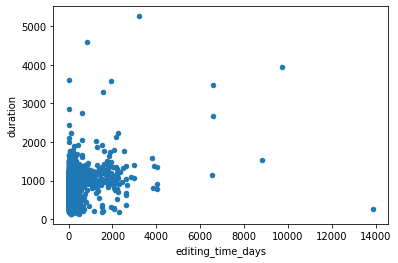

In [202]:
import matplotlib.pyplot as plt
df.plot(x="editing_time_days", y="duration", kind = 'scatter')
plt.show()

На получившемся графике нельзя точно выявить зависимость между потраченным временем на обработку видео и его продолжительностью 

### Гипотеза №2:
Чем больше тегов у видео, тем меньше просмотров \
Обоснование: чем больше тегов, тем более узкоспециализировано видео, а значит на меньшее число людей оно направлено

Создадим список всех тегов:    

In [203]:
tags_list = []
for item in df['tags']:
    for i in item:
        if i not in tags_list:
            tags_list.append(i)

In [204]:
len(tags_list)

416

Добавим столбец с количеством тэгов:

In [205]:
df['tags_count'] = df.tags.apply(lambda item: len(item))

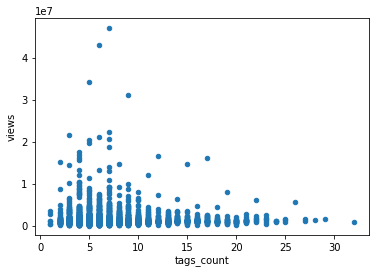

In [206]:
df.plot(x="tags_count", y="views", kind = 'scatter')
plt.show()

Видим, что чем больше становится число тэгов, тем меньше оно набирает просмотров. Следовательно, гипотеза верна

### Гипотеза №3:
На технические тематики выступают чаще мужчины, чем женщины \
Обоснование: Стереотипы

Создадим словарь **tags_dict**, в котором будем хранить количество указания тэга в зависимости от пола спикера

In [222]:
tags_dict = []

In [223]:
for k in range(len(tags_list)):
    tags_dict.append(dict.fromkeys(['tag', 'male_count', 'female_count', 'total_count'], 0))
    tags_dict[k]['tag'] = tags_list[k]
    for i in range(2550):
        if tags_list[k] in df['tags'][i]:
            if df['speaker_sex'][i] == 'male' or df['speaker_sex'][i] == 'mostly_male':
                tags_dict[k]['male_count'] += 1
            if df['speaker_sex'][i] == 'female' or df['speaker_sex'][i] == 'mostly_female':    
                tags_dict[k]['female_count'] += 1
            tags_dict[k]['total_count'] += 1

In [242]:
tags_dict = sorted(tags_dict, key=lambda k: k['total_count'], reverse=True) 

Создадим листы, в которых будем хранить тэги, относящиеся к определенному полу

In [261]:
tags_male, tags_female = [], []

In [262]:
for i in range(len(tags_dict)):
    if tags_dict[i]['male_count'] > tags_dict[i]['female_count']:
        tags_male.append(tags_dict[i]['tag'])
    else:
        tags_female.append(tags_dict[i]['tag'])

Получаем списки наиболее популярных тэгов для каждого пола:

In [265]:
tags_male[:10]

['technology',
 'science',
 'globalissues',
 'culture',
 'TEDx',
 'design',
 'business',
 'entertainment',
 'health',
 'innovation']

In [266]:
tags_female[:10]

['activism',
 'women',
 'personalgrowth',
 'violence',
 'family',
 'illness',
 'parenting',
 'death',
 'race',
 'aging']

Видим, что спикеры-мужчины говорят больше о ___, а женщины-спикеры - больше об общих понятиях. Таким образом гипотеза подтверждена

In [274]:
tags_dict[0]

{'tag': 'technology',
 'male_count': 521,
 'female_count': 142,
 'total_count': 727}

### Гипотеза №4:
Видео, где спикер - мужчина, набирают больше рейтинга 'Funny', чем те, где спикер - женщина \
Обоснование: Стереотипы

Посмотрим для всех ли строк дано одинаковое количество различных описаний 'Funny', 'Beautiful', 'Courageous' и т.д.

In [35]:
df.ratings.apply(lambda item: len(item)).nunique()

1

In [102]:
df.ratings.apply(lambda item: len(item)).max()

14

Каждое видео имеет 14 слов-описаний. Возьмем один рейтинг 'Funny' и выделим его 'count' для каждого видео:

In [104]:
for i in range(2550):
    for j in range(14):
        if 'Funny' in df['ratings'][i][j].values():
            df['rating_funny'][i] = df['ratings'][i][j].get('count')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


А теперь посмотрим на его распределение в зависимости от пола спикера. Возьмем максимальное число для каждого пола:

In [101]:
df1 = df[df['rating_funny'] == df.groupby('speaker_sex')['rating_funny'].transform('max')]
df1[['speaker_sex', 'rating_funny']]

,speaker_sex,rating_funny
0,male,19645
21,andy,2799
452,mostly_female,4166
685,female,4025
837,unknown,5225
1129,mostly_male,7315


Также посмотрим на среднее значение для каждого пола:

In [105]:
speaker_sex_funny = df.groupby('speaker_sex').agg(lambda x: np.mean(x))['rating_funny'].reset_index()

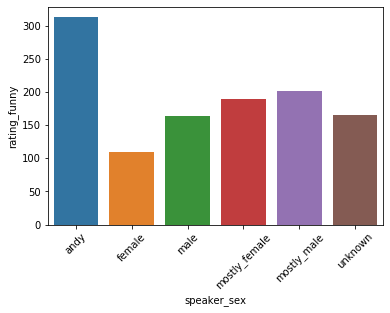

In [106]:
sns.barplot(speaker_sex_funny.speaker_sex, speaker_sex_funny.rating_funny)
plt.xticks(rotation=45)
plt.show()

Если не учитывать категорию 'andy', то видим, что у спикеров-мужчин count 'Funny' больше, чем у спикеров-женщин, что подтверждает гипотезу

### Гипотеза №5:


По количеству комментариев можно узнать что в мире больше всего обсуждалось \
Обоснование: Самые острые темы больше комментируются

In [133]:
df2 = df[df['comments'] == df.groupby('published_date_year')['comments'].transform('max')]
df2[['published_date_year', 'comments', 'title']]

,published_date_year,comments,title
0,2006,4553,Do schools kill creativity?
96,2007,6404,Militant atheism
201,2008,2877,My stroke of insight
381,2009,1604,Your elusive creative genius
644,2010,3356,Science can answer moral questions
954,2011,2492,Taking imagination seriously
1346,2012,2290,Your body language may shape who you are
1537,2013,1640,A tale of two political systems
1787,2014,2673,How do you explain consciousness?
1940,2015,1355,The price of shame
